In [1]:
import numpy as np
from numpy import sort
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from pandas import DataFrame
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
#from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn import metrics

from sklearn.feature_selection import SelectFromModel

from random import seed
from random import randrange


In [2]:
data = pd.read_csv("C:\\Users\Hannah\Desktop\Research Project\data.csv")
data = data.drop(["Unnamed: 32", "id"],1)

X = data.values[:,2:-1].astype('float64')
X = (X - np.mean(X, axis =0)) /  np.std(X, axis = 0)
X = np.hstack([np.ones((X.shape[0], 1)),X]) 
X = MinMaxScaler().fit_transform(X)
Y = data["diagnosis"].map({'M':1,'B':0})
Y = np.array(Y)

In [3]:
X_select = data[['texture_mean', 'smoothness_mean', 'compactness_mean',
       'radius_se', 'symmetry_se', 'symmetry_mean', 'fractal_dimension_se', 'radius_worst', 'texture_worst',
        'area_worst', 'smoothness_worst',
       'compactness_worst', 'symmetry_worst']]

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X_select, Y, test_size=0.25, random_state=0)
print(X_train.shape)

(426, 13)


In [7]:
def Sigmoid(z):
    return 1/(1 + np.exp(-z))

In [8]:
def Hypothesis(theta, x):   
    return Sigmoid(x @ theta)

In [9]:
def Cost_Function(X,Y,theta,m):
    hi = Hypothesis(theta, x)
    _y = Y.reshape(-1, 1)
    J = 1/float(m) * np.sum(-_y * np.log(hi) - (1-_y) * np.log(1-hi))
    return J

In [10]:
def Cost_Function_Derivative(X,Y,theta,m,alpha):
    hi = Hypothesis(theta,X)
    _y = Y.reshape(-1, 1)
    J = alpha/float(m) * X.T @ (hi - _y)
    return J

def Gradient_Descent(X,Y,theta,m,alpha):
    new_theta = theta - Cost_Function_Derivative(X,Y,theta,m,alpha)
    return new_theta

In [11]:
def Accuracy2(theta):
    correct = 0
    length = len(X_test)
    prediction = (Hypothesis(theta, X_test) > 0.5) #replaced round to use predictions which are correct is ranging between the Y shape below
    _y = Y_test.reshape(-1, 1)
    correct = prediction == _y
    my_accuracy = (np.sum(correct) / length)*100
    print ('LR Accuracy with scikit-learn selected features: ', my_accuracy, "%")
    
def Logistic_Regression2(X,Y,alpha,theta,num_iters):
    m = len(Y)
    for x in range(num_iters):
        new_theta = Gradient_Descent(X,Y,theta,m,alpha)
        theta = new_theta
        if x % 100 == 0:
            print #('theta: ', theta)    
            print #('cost: ', Cost_Function(X,Y,theta,m))
    Accuracy2(theta)
    print('Selected feature weights:', theta)
    #x = np.linspace(-10, 30, 50)
    #y = -(theta[0] + theta[1]*x)/theta[2]
    #plt.plot(X_train, Y_train)
    #plt.plot(theta)
    #plt.show()
    #idxs_selected = select.get_support(indices=True)
    #print(idxs_selected)
  
ep = .012   #sets initial theta to random non zero numbers +/- .012 specifically is arbitrary

initial_theta = np.random.rand(X_train.shape[1],1) * 2 * ep - ep
alpha = 0.5
iterations = 10000
Logistic_Regression2(X_train,Y_train,alpha,initial_theta,iterations)

C:\Users\Hannah\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


LR Accuracy with scikit-learn selected features:  84.6153846154 %
Selected feature weights: [[ -1.40824150e+03]
 [ -1.64163044e+01]
 [  9.94034511e+00]
 [  9.42902171e+00]
 [ -3.71885853e+00]
 [ -2.89220341e+01]
 [ -3.20175737e-01]
 [ -2.09268486e+03]
 [ -7.36779661e+02]
 [  9.58164139e+01]
 [ -1.59250392e+01]
 [  6.27735636e+01]
 [ -2.81008644e+01]]


C:\Users\Hannah\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


LR Accuracy with scikit-learn selected features:  83.2167832168 %
Confusion Matrix: 
 [[ 9 81]
 [15 38]]


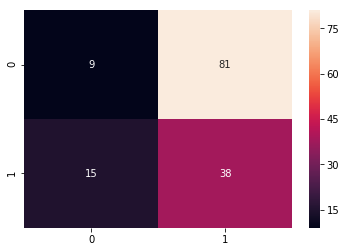

In [12]:
def Accuracy2(theta):
    correct = 0
    length = len(X_test)
    prediction = (Hypothesis(theta, X_test) > 0.5) #replaced round to use predictions which are correct is ranging between the Y shape below
    _y = Y_test.reshape(-1, 1)
    correct = prediction == _y
    my_accuracy = (np.sum(correct) / length)*100
    print ('LR Accuracy with scikit-learn selected features: ', my_accuracy, "%")

def cf(theta):
    correct = 0
    length = len(X_test)
    prediction = (Hypothesis(theta, X_test) > 0.5) #replaced round to use predictions which are correct is ranging between the Y shape below
    _y = Y_test.reshape(-1, 1)
    correct = prediction == _y
    cm=confusion_matrix(Y_test, correct)
    print("Confusion Matrix:", "\n", confusion_matrix(Y_test, correct))
    sns.heatmap(cm,annot=True,fmt="d")


    
def Logistic_Regression2(X,Y,alpha,theta,num_iters):
    m = len(Y)
    for x in range(num_iters):
        new_theta = Gradient_Descent(X,Y,theta,m,alpha)
        theta = new_theta
        if x % 100 == 0:
            print #('theta: ', theta)    
            print #('cost: ', Cost_Function(X,Y,theta,m))
    Accuracy2(theta)
    cf(theta)
    
  
ep = .012   #sets initial theta to random non zero numbers +/- .012 specifically is arbitrary

initial_theta = np.random.rand(X_train.shape[1],1) * 2 * ep - ep
alpha = 0.5
iterations = 10000
Logistic_Regression2(X_train,Y_train,alpha,initial_theta,iterations)

In [77]:
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
KFold(nsplits=4, shuffle=True).splits(X_train) 

TypeError: __init__() got an unexpected keyword argument 'nsplits'

In [ ]:
def cross_validation_split(dataset, folds=10):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / folds)
    for i in range(folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split

seed(1)
dataset = X_train
folds = cross_validation_split(dataset, 4)
print(folds) 